# **analysing the fivemer redo somulations**

In [69]:
import numpy as np 
import json 
import matplotlib.pyplot as plt
import pandas as pd

### **coding**
- basically want to read in 100 trials, calculate mutability

In [8]:
nTrial=100

In [5]:
avMut_coding_dict = {}

for i in range(nTrial): 
    weights = json.load(open("data/fivemer_sims/coding/trial{}_weights.txt".format(i)))
    weightsI = json.load(open("data/fivemer_sims/coding/trial{}_weightsI.txt".format(i)))
    avMut_coding_dict["trial{}".format(i)] = {"initial":np.mean(weightsI),"final":np.mean(weights)}

In [15]:
avMut_initial_cds = []
avMut_final_cds = []
avMut_chnage_cds = []
for key,val in avMut_coding_dict.items(): 
    avMut_initial_cds.append(val["initial"])
    avMut_final_cds.append(val["final"])
    avMut_chnage_cds.append((val["initial"]-val["final"])/val["initial"])

(array([ 9., 12., 21., 12., 17.,  8., 10.,  5.,  3.,  3.]),
 array([2.95951861e-05, 3.16340782e-05, 3.36729703e-05, 3.57118624e-05,
        3.77507545e-05, 3.97896466e-05, 4.18285387e-05, 4.38674308e-05,
        4.59063229e-05, 4.79452150e-05, 4.99841071e-05]),
 <BarContainer object of 10 artists>)

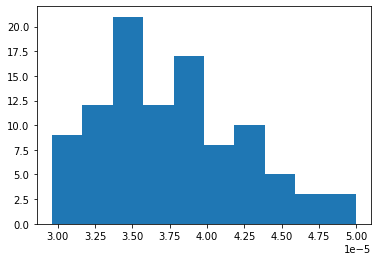

In [26]:
plt.hist(avMut_final_cds)

(array([ 2.,  6., 14., 17., 25., 13., 12.,  6.,  4.,  1.]),
 array([2.90807497e-05, 2.94389742e-05, 2.97971987e-05, 3.01554232e-05,
        3.05136477e-05, 3.08718721e-05, 3.12300966e-05, 3.15883211e-05,
        3.19465456e-05, 3.23047701e-05, 3.26629946e-05]),
 <BarContainer object of 10 artists>)

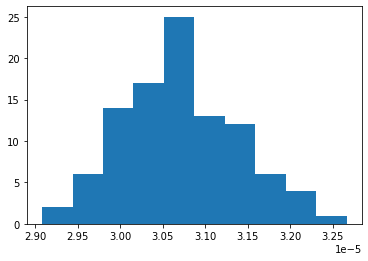

In [27]:
plt.hist(avMut_final_Ncds)

<BarContainer object of 3 artists>

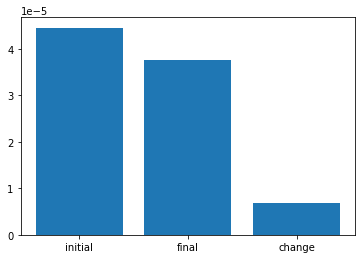

In [14]:
plt.bar(["initial","final","change"],[np.mean(avMut_initial_cds),np.mean(avMut_final_cds),np.mean(avMut_chnage_cds)])

### **noncoding**

In [18]:
avMut_noncoding_dict = {}
nTrial=100
for i in range(nTrial): 
    weights = json.load(open("data/fivemer_sims/nonCoding/trialtrial{}_weights.txt".format(i)))
    weightsI = json.load(open("data/fivemer_sims/nonCoding/trialtrial{}_weightsI.txt".format(i)))
    avMut_noncoding_dict["trial{}".format(i)] = {"initial":np.mean(weightsI),"final":np.mean(weights)}

In [19]:
avMut_initial_Ncds = []
avMut_final_Ncds = []
avMut_chnage_Ncds = []
for key,val in avMut_noncoding_dict.items(): 
    avMut_initial_Ncds.append(val["initial"])
    avMut_final_Ncds.append(val["final"])
    avMut_chnage_Ncds.append((val["initial"]-val["final"])/val["initial"])

SyntaxError: invalid syntax (1269392081.py, line 1)

# **summary**

(array([ 3.,  2.,  4.,  5., 19., 28., 21., 11.,  5.,  2.]),
 array([0.45131426, 0.46060751, 0.46990076, 0.47919401, 0.48848726,
        0.49778051, 0.50707376, 0.51636701, 0.52566026, 0.53495351,
        0.54424676]),
 <BarContainer object of 10 artists>)

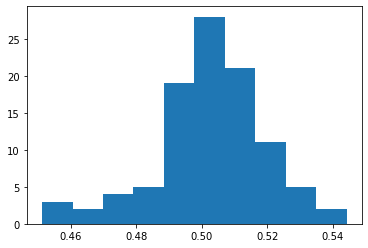

In [20]:
plt.hist(avMut_chnage_Ncds)

In [23]:
np.mean(avMut_final_cds), np.mean(avMut_final_Ncds), (np.mean(avMut_final_cds)- np.mean(avMut_final_Ncds))/np.mean(avMut_final_cds) 

(3.7682299223955275e-05, 3.070145589156653e-05, 0.18525523856439477)

In [25]:
np.std(avMut_final_cds)/10, np.std(avMut_final_Ncds)/10

(4.668626750798167e-07, 6.861403218486098e-08)

# **noncoding relationship with mutability plot**

In [14]:
model = json.load(open("../Human_mutability_model/Model_fivemer_genomeWide_512doubled_2021_09_03.txt"))

In [18]:
fivemer_counts = {}
for fivemer in model.keys(): 
    fivemer_counts[fivemer] = [0 for i in range(nTrial)]


In [19]:
for i in range(nTrial): 
    dna = open("data/fivemer_sims/nonCoding/trialtrial{}_DNA.txt".format(i)).readlines()[0]
    for j in range(2,len(dna)-2): 
        cur_5mer = dna[j-2:j+3]
        fivemer_counts[cur_5mer][i]+=1

In [72]:
fivemer_results={}
fivemer_results["fivemer_muts"] = []
fivemer_results["fivemer_log10muts"] = []
fivemer_results["fivemer_av_count"] = []
fivemer_results["fivemer_stderr"] = []
fivemer_results["fivemers_ordered"] = []
for fivemer,val in fivemer_counts.items(): 
    fivemer_results["fivemers_ordered"].append(fivemer)
    fivemer_results["fivemer_muts"].append(model[fivemer][0])
    fivemer_results["fivemer_log10muts"].append(np.log10(model[fivemer][0]))
    fivemer_results["fivemer_av_count"].append(np.mean(val))
    fivemer_results["fivemer_stderr"].append(np.std(val)/np.sqrt(nTrial))

In [73]:
fivemer_results_df= pd.DataFrame.from_dict(fivemer_results)

In [74]:
fivemer_results_df.to_csv("data/fivemer_sims/nonCoding/dataframe_fivemer_results_summary_2022_01_04.csv")

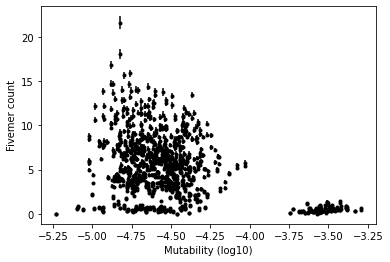

In [64]:
# plt.scatter(fivemer_log10muts,fivemer_av_count,c="black",s=7)
plt.errorbar(fivemer_log10muts,fivemer_av_count, yerr=fivemer_stderr, fmt="o",c="black",markersize=3)
#https://stackoverflow.com/questions/50360567/python-errorbar-with-varied-marker-size
#https://www.geeksforgeeks.org/use-error-bars-in-a-matplotlib-scatter-plot/
plt.xlabel("Mutability (log10)")
plt.ylabel("Fivemer count")
# plt.savefig("plots/Scatter_2022_01_04_fivemer_noncoding_countsVsMut_2xMutCov_100nTrial_5kbp_errorbars.pdf")

In [53]:
np.linspace(0.05, 0.5, 10)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])